<a href="https://colab.research.google.com/github/unguyen14/Shipping_Ecommerce/blob/main/E_commerce_shipping_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - E-commerce Customer Shipping Analysis
### CSIS 3290 Fundamental of Machine Learning
- Group Members: Daniil Volovik (300313470), Do Man Uyen Nguyen (300318626), Fabio Turazzi (300318010)

### References:
- CSIS3290 - Course Material
- https://scikit-learn.org/stable/

# Project Information:
-  The dataset we use for this project is **E-Commerce Shipping Data** dataset obtained from Kaggle. The main purpose of our project is to find out the efficiency of the system as well as to build a predictive model that can potentially predict correctly whether the shipment will be delivered on time, so that we can improve shipment quality and offer better services to customers. 

# 0. Data Preparation & Dataset Overview

In [ ]:
#upload your api file
from google.colab import files
! pip install -q kaggle
files.upload()

{}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#download dataset from kaggle
! kaggle datasets download -d prachi13/customer-analytics
! chmod 600 /root/.kaggle/kaggle.json

customer-analytics.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
#unzip dataset
!unzip customer-analytics.zip

Archive:  customer-analytics.zip
replace Train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
#Import all libraries that will be used in the notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
#Read train file to a dataframe
df = pd.read_csv('Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
#getting total null values per variable
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

### Comments:
- The dataset contains 12 columns in total, with the target variable is **Reached.on.Time_Y.N**. 
  - This column contains binary values of 0 and 1, with 0 signifying the delivery was late, and 1 signifying the delivery was on time.
  - We will also rename this column to *Delivery_status*
- Since the ID does not have any influence on our target variable, it will be dropped from the dataset.
- There is neither any missing nor wrongly-formatted data.

In the next step, we will do EDA to better understand the characteristics and the relationships between our variables. 


In [ ]:
#drop column ID
df=df.drop(columns=['ID'], axis=1)

In [ ]:
#rename target variable for convenience
df.rename(columns={'Reached.on.Time_Y.N': 'Delivery_status'}, inplace=True)
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Delivery_status'],
      dtype='object')

# 1. Handling Categorical Data - Dummy Variables

### Comments
- We converted our categorical data into Dummy variables to perform our analysis. In the original dataset we had 4 features with non-numeric data types: 'Warehouse_block', 'Mode_of_Shipment', 'Product_importance', and 'Gender'. Later we will drop these columns.

In [ ]:
#identify categorical and non-categorical columns
org_col = df.columns
cat_col = df.select_dtypes('object').columns
non_cat_col = df.select_dtypes(exclude=['object'])
df1=df[org_col].copy()
print(cat_col)
print(non_cat_col)

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')
       Customer_care_calls  Customer_rating  ...  Weight_in_gms  Delivery_status
0                        4                2  ...           1233                1
1                        4                5  ...           3088                1
2                        2                2  ...           3374                1
3                        3                3  ...           1177                1
4                        2                2  ...           2484                1
...                    ...              ...  ...            ...              ...
10994                    4                1  ...           1538                1
10995                    4                1  ...           1247                0
10996                    5                4  ...           1155                0
10997                    5                2  ...           1210                0
10998         

In [ ]:
#generate dummies for features 
dummies_X = pd.get_dummies(df[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']].astype(str),
                         prefix = cat_col)

In [ ]:
#Join dummies with original dataframe
df=df.join(dummies_X)

df.head(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Delivery_status,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,D,Flight,4,2,177,3,low,F,44,1233,1,0,0,0,1,0,1,0,0,0,1,0,1,0
1,F,Flight,4,5,216,2,low,M,59,3088,1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,A,Flight,2,2,183,4,low,M,48,3374,1,1,0,0,0,0,1,0,0,0,1,0,0,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1,0,1,0,0,0,1,0,0,0,0,1,0,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1,0,0,1,0,0,1,0,0,0,0,1,1,0


# 2. Exploratory Data Analysis

## 2.1. Numerical Variables Overview

In [ ]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Delivery_status,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691,0.166652,0.166652,0.166652,0.166742,0.333303,0.161560,0.160015,0.678425,0.086190,0.481589,0.432221,0.504137,0.495863
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584,0.372681,0.372681,0.372681,0.372763,0.471415,0.368064,0.366636,0.467102,0.280657,0.499684,0.495407,0.500006,0.500006
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Comments
- Some Variables, namely Cost_of_the_Product, Discount_offered, and Weight_in_gms have a wide range of values, which suggests us to apply scaling techniques.	

## 2.2. Variables' Correlation 

In [ ]:
df.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Delivery_status,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126,-0.006375,-0.013428,0.004099,-0.000401,0.012732,0.019093,0.003292,-0.017629,-0.048995,0.047111,-0.019761,-0.002545,0.002545
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119,-0.010471,-0.003222,0.001093,0.008687,0.003092,-0.002481,0.001516,0.000765,0.000679,-0.004752,0.004408,-0.002775,0.002775
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587,-0.013299,0.018260,0.009255,0.006618,-0.016472,-0.008130,0.002531,0.004419,-0.040421,0.037361,-0.014785,-0.019759,0.019759
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515,0.002979,0.002178,-0.003750,0.010095,-0.009095,-0.000263,0.003913,-0.002864,0.018066,-0.024921,0.014902,0.009395,-0.009395
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108,-0.004157,-0.005135,0.000736,-0.007714,0.012864,-0.005750,-0.007787,0.010643,0.024514,-0.019638,0.005920,0.011777,-0.011777
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793,-0.005078,0.000461,0.002000,-0.001414,0.003187,-0.001245,0.004146,-0.002273,0.069775,-0.080468,0.041634,-0.003573,0.003573
Delivery_status,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000,-0.009317,0.005106,0.000132,0.000830,0.002568,0.004371,-0.007671,0.002577,0.033242,-0.007667,-0.011099,-0.004689,0.004689
Warehouse_block_A,-0.006375,-0.010471,-0.013299,0.002979,-0.004157,-0.005078,-0.009317,1.000000,-0.199978,-0.199978,-0.200044,-0.316189,0.000570,0.000461,-0.000811,0.006098,0.012815,-0.016380,0.001911,-0.001911
Warehouse_block_B,-0.013428,-0.003222,0.018260,0.002178,-0.005135,0.000461,0.005106,-0.199978,1.000000,-0.199978,-0.200044,-0.316189,-0.000093,0.000461,-0.000289,-0.010419,-0.013551,0.019570,-0.007847,0.007847
Warehouse_block_C,0.004099,0.001093,0.009255,-0.003750,0.000736,0.002000,0.000132,-0.199978,-0.199978,1.000000,-0.200044,-0.316189,-0.000755,0.000461,0.000233,0.008706,-0.004274,-0.000621,-0.001504,0.001504


### Comment:
- From the table, we observe that the 2 variables **Discount_offered** and **Weight_in_gms** have the strongest correlation with our target variable **Delivery_status** among all the variables.
     - **Discount_offered** has positive and moderate correlation of 0.4 with **Delivery_status**.
     - **Weight_in_gms** has negative and moderate correlation of -0.27 with **Delivery_status**.
     - The rest of the variables has a very weak correlation of less than 0.1 with **Delivery_status**.

## 2.3. Data Visualization

In [ ]:
#This function will render the count plot for a given variable    
def count_plot_cat(variable_name):
    sns.countplot(data=df,x=variable_name,hue='Delivery_status',order = df[variable_name].value_counts().index)
    plt.title('Count plot ' + variable_name)
    plt.show()

def count_plot_numeric(variable_name):
    sns.barplot(x=variable_name, y=variable_name, data=df, estimator=lambda x: len(x) / len(df) * 100)
    plt.ylabel("Percent")
    plt.show()
# Lastly, set a few properties for sns
sns.set(style='darkgrid', palette="vlag", font_scale=1.1, rc={"figure.figsize": [10, 5]})

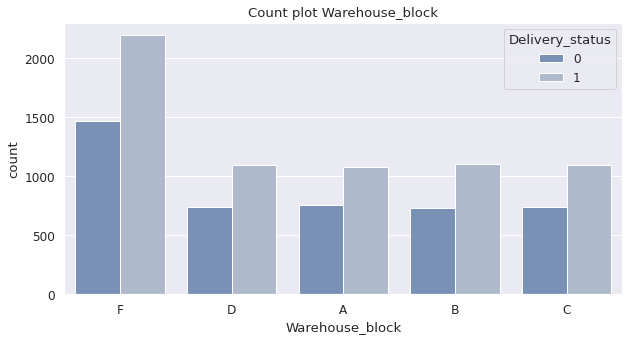

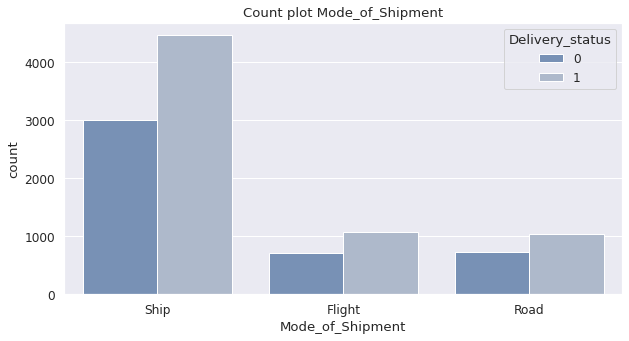

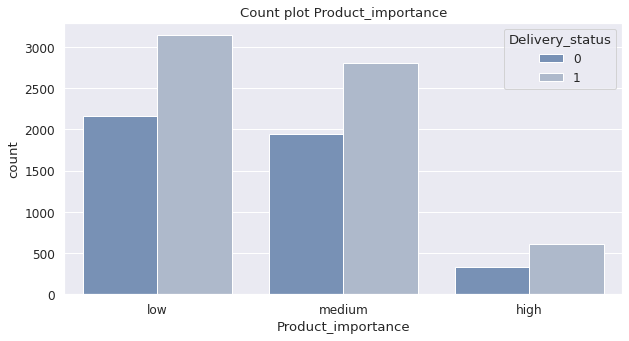

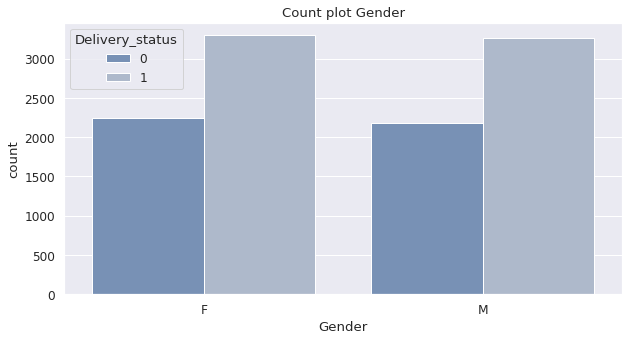

In [ ]:
#display count plots for categorical variables
for cat in cat_col:
    count_plot_cat(cat)

### Warehouse:
- The biggest delivery traffic goes through warehouse "F" with total number of orders exceeding 3500. Other warehouses are evenly loaded with slightly less than 2000 order per warehouse. 
- About 40% of all orders were not delivered on time in each location

### Mode of Shipment
- The dominant way of order transportation is by ship, which reaches about 7200 orders, and the rest is evenly distributed between flight and road options.
- About 40% of all orders were not delivered on time for each shipment mode

### Product Importance
- Almost a half of all orders had low priority and about 10% were labeled as high priority orders. 
- About 40% of all orders were not delivered on time for each priority category

### Gender
- There is almost even number of male and female customers with same delivery status proportions

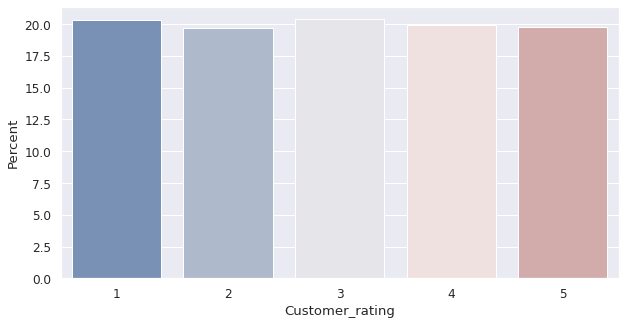

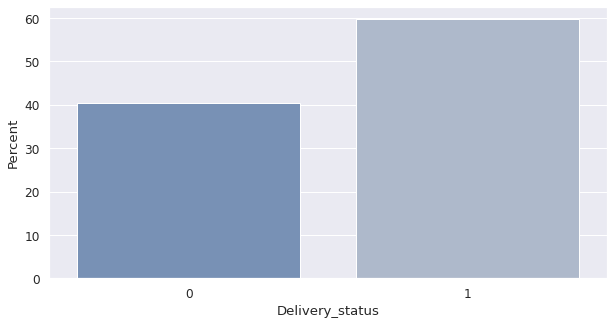

In [ ]:
#count plot for ordinal variables:
ord_vars=['Customer_rating', 'Delivery_status']
for i in ord_vars:
    count_plot_numeric(i)

### Customer Rating and Delivery:
- About 40% of all orders was not delivered on time. 
- Costomer ratings are almost evenly distributed (about 20% of customers per each grade). The average rating given by customers is approximately 3.

## 2.4 Variable Relationships

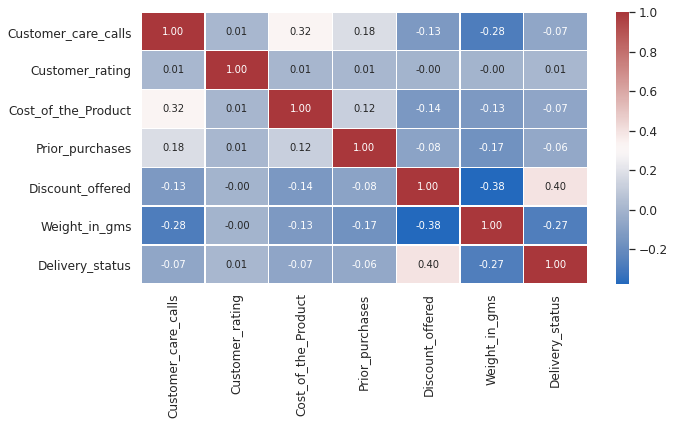

In [ ]:
# Showing heatmap of all variables
sns.heatmap(non_cat_col.corr(),
            cmap="vlag", 
            linewidths=0.3,
            annot=True,
            fmt='.2f',
            annot_kws={'size':10})

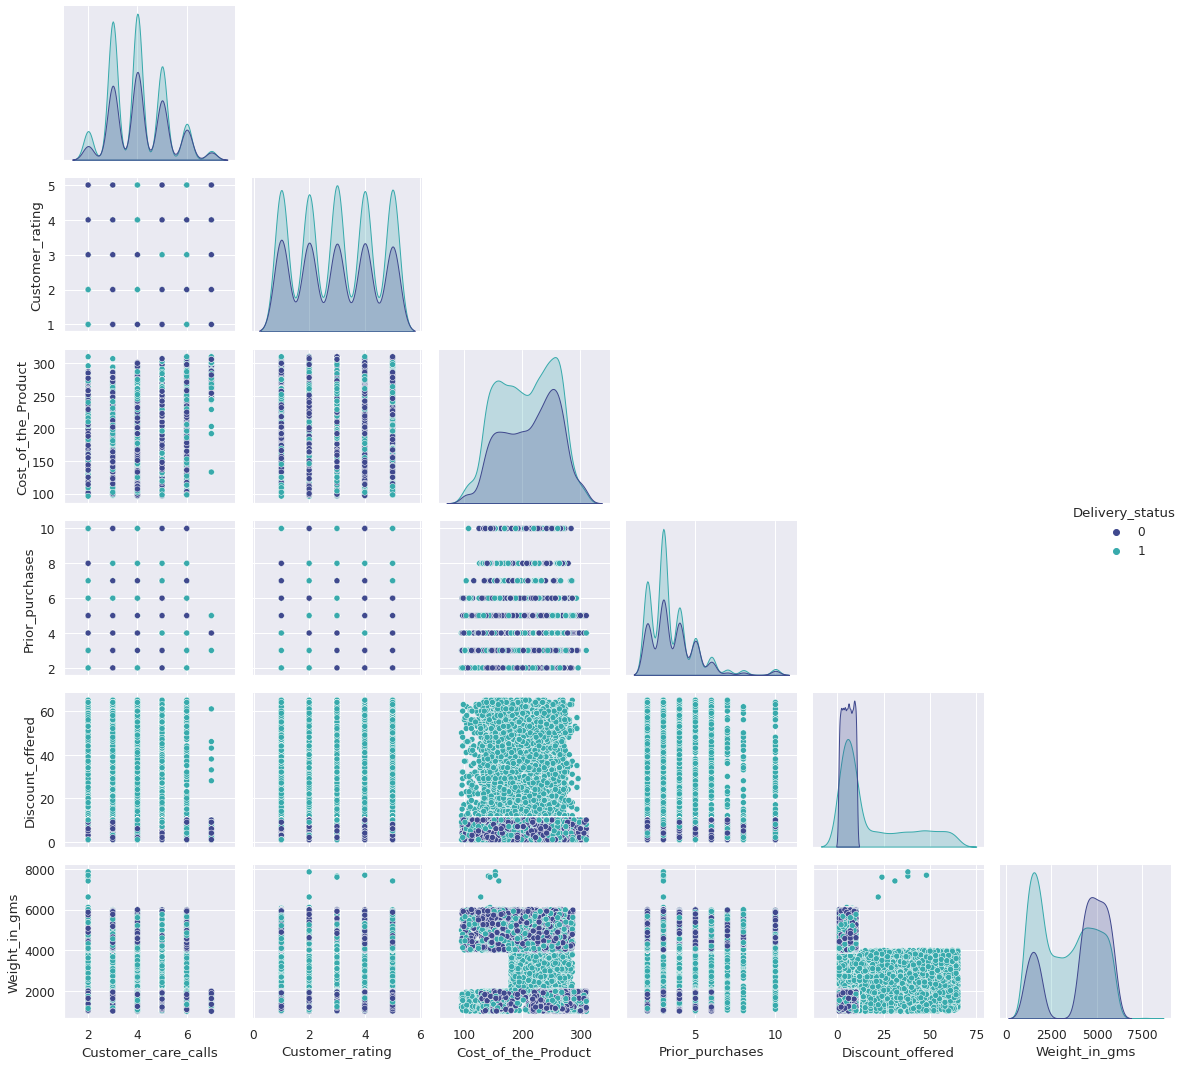

In [ ]:
#Plot pairplot for remaining variables
sns.pairplot(data=df1, hue='Delivery_status', corner=True, palette='mako')
plt.tight_layout()

### Comments
- After examining the correlation table and visualizations of our data, we cannot see a strong correlation between most of the numerical features and delivery status. Although, we can Identify some clusters:
    - Discount offered (corr 0.4): Orders with discount 10% or less tend to be delivered late.
    - Weight in gramms (corr -0.27): We can see, that among all orders there is a significant number of delayed orders if the shipping item's weight was less than 2000 gramms and in the range between 4000 and 6000 gramms. 
    - Here, we also identified outliers that seem offset from the general pattern observed in the rest of the dataset.
    - For the analyses, we decided to drop orders that presented weight above 6100 gramms).

### 2.4.1. Dropping the Outliers

In [ ]:
#dropping orders with weight greater than 6100 grams
df = df[df["Weight_in_gms"] < 6100]
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Delivery_status,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,D,Flight,4,2,177,3,low,F,44,1233,1,0,0,0,1,0,1,0,0,0,1,0,1,0
1,F,Flight,4,5,216,2,low,M,59,3088,1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,A,Flight,2,2,183,4,low,M,48,3374,1,1,0,0,0,0,1,0,0,0,1,0,0,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1,0,1,0,0,0,1,0,0,0,0,1,0,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1,0,0,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1,1,0,0,0,0,0,0,1,0,0,1,1,0
10995,B,Ship,4,1,232,5,medium,F,6,1247,0,0,1,0,0,0,0,0,1,0,0,1,1,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0,0,0,1,0,0,0,0,1,0,1,0,1,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0,0,0,0,0,1,0,0,1,0,0,1,0,1


## 2.5. Additional Exporation of Relevant Variables - Discount_offered and Weight_in_gms
- This last step of our EDA was added after we made our model findings. Considering the feature selection implemented later on this document will identify Discount_offered and Weight_in_gms as the only significant variables to describe Delivery_status, we will explore the relationship of those two variables with the other features on the dataset to understand if they may indirectly explain some information from other order characteristics.
- The following comparisons indicated some relationship that may help explain the selection, potentially implying that those characteristics are somehow considered in the model indirectly by the two independent variables:
    - Weight in gms and Product_importance
    - Discount offered and Product importance

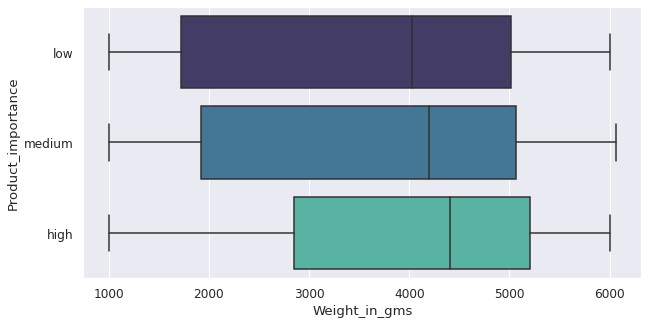

In [ ]:
#Generate boxplot comparing Product_importance and weight
sns.boxplot(data=df, x='Weight_in_gms', y="Product_importance", palette='mako')
plt.show()

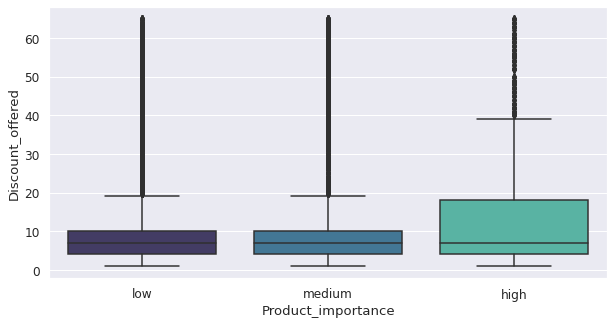

In [ ]:
#Generate boxplot
sns.boxplot(data=df, y='Discount_offered', x='Product_importance', palette='mako')  
plt.show()

# 3. Feature Selection and Oversampling
- In this step, we will create different feature sets using the following feature selection methods:
    - Logistic Regression with SelectFromModel
    - Linear SVM with SelectFromModel
    - SelectKBest
    - RandomForest with SelectFromModel
- We will also create 2 feature sets with oversampling, to balance deliveries made on time and delayed in the dataset.
- All feature sets will be later experimented with to define the best candidate for our modelling stage.

## 3.1. Dropping Unnecessary Variables and Separating Features & Response

In [ ]:
#Drop categorical variables AND response variable
features = df.drop(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Delivery_status'], axis=1)
response = df['Delivery_status']

## 3.2. Applying OverSampling to the Data
- Rebalancing the Delivery_Status classes distribution for an our dataset: number of orders deliveries on time exceeds with delayed ones by 50% which can affect our model performance.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# define resampling
rus = RandomOverSampler(random_state=42)
# fit predictor and target variable
features_ros_ar, response_ros_ar = rus.fit_resample(features, response)

#put the features and response np.array to dataframe
features_ros = pd.DataFrame(features_ros_ar, columns=features.columns)
response_ros = pd.DataFrame(response_ros_ar, columns=['Delivery_Status'])

print('Original dataset:', response.describe(), "\n")
print('Resample dataset', response_ros.describe())

Original dataset: count    10992.000000
mean         0.596434
std          0.490635
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Delivery_status, dtype: float64 

Resample dataset        Delivery_Status
count     13112.000000
mean          0.500000
std           0.500019
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           1.000000


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#set sample set to use for training model
features = features_ros
response = response_ros.squeeze()

## 3.1. Using Logistic Regression

In [ ]:
#import libraries
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

#define SelectFromModel with LogisticRegression 
selector_logistic = SelectFromModel(estimator=LogisticRegression(max_iter=5000))
selector_logistic.fit(features, response)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=5000, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='lbfgs',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
#features's coefficient
print(selector_logistic.estimator_.coef_)
#cutoff abs(coefficient) value for feature significance
print(selector_logistic.threshold_)

[[-0.06298022  0.05808685 -0.00081092 -0.04736991  0.12444645 -0.00018616
  -0.00454387  0.00996678  0.00572697  0.00711594 -0.00237435  0.00997933
  -0.00587829  0.01179044  0.03070591 -0.02342453  0.00861011 -0.00021736
   0.01610885]]
0.022648592043021557


In [ ]:
#get name in list
log_col=features.columns[selector_logistic.get_support(indices=True)].tolist()
print(log_col, "\nTotal features selected using LogisticRegression", len(log_col))

['Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Product_importance_high', 'Product_importance_low'] 
Total features selected using LogisticRegression 6


In [ ]:
#save list of features to reuse
features_log = features[log_col].copy()

### Comments:
- Calculated threshold: 0.016
- Total of 6 selected features: 'Customer_care_calls', 'Customer_rating', 'Prior_purchases','Product_importance_high', 'Product_importance_low', and 'Discount_offered'

## 3.2. Linear SVM

In [ ]:
#import libraries
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

#define SelectFromModel with LinearSVC 
selector_svm = SelectFromModel(estimator=LinearSVC(dual=False,max_iter=10000,C=0.001)).fit(features, response)

#get list of features selected
svm_col=features.columns[selector_svm.get_support(indices=True)].tolist()
print(svm_col, "\nTotal features selected using SVM", len(svm_col))

['Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Mode_of_Shipment_Ship', 'Product_importance_high', 'Product_importance_low', 'Gender_M'] 
Total features selected using SVM 8


In [ ]:
#save list of features to reuse
features_svm = features[svm_col].copy()

### Comments:
- Total of 8 selected features: 'Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Mode_of_Shipment_Ship', 'Product_importance_high', 'Product_importance_low', and 'Gender_M'

## 3.3. Random Forest

In [ ]:
#import libraries
from sklearn.ensemble import RandomForestClassifier

##define SelectFromModel with randomforest  
rf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=16, random_state=42)
selector_rf = SelectFromModel(estimator=rf)
selector_rf.fit(features, response)
print(selector_rf.threshold_)

#get name in list
rf_col=features.columns[selector_rf.get_support(indices=True)].tolist()
print(rf_col, "\nTotal features selected using RandomForest", len(rf_col))

0.05263157894736842
['Discount_offered', 'Weight_in_gms'] 
Total features selected using RandomForest 2


In [ ]:
#save list of features to reuse
features_rf = features[rf_col].copy()

### Comments:
- Selected only 2 features: 'Discount_offered' and 'Weight_in_gms'

## 3.4. SelectKBest

In [ ]:
#import libraries
from sklearn.feature_selection import SelectKBest, mutual_info_classif

#define selectkbeset with mutial_info_classif, default number of features is 10
selector_k = SelectKBest(mutual_info_classif)
X_new = selector_k.fit_transform(features, response)
print(X_new)

[[  4   2 177 ...   1   0   0]
 [  4   5 216 ...   0   0   0]
 [  2   2 183 ...   0   0   0]
 ...
 [  4   5 205 ...   0   1   1]
 [  6   1 266 ...   1   1   0]
 [  3   1 139 ...   0   1   1]]


In [ ]:
#get name in list
k_col=features.columns[selector_k.get_support(indices=True)].tolist()
print(k_col,"\nTotal features selected using SelectKBest:",len(k_col))

['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Warehouse_block_C', 'Warehouse_block_D', 'Mode_of_Shipment_Ship', 'Product_importance_medium'] 
Total features selected using SelectKBest: 10


In [ ]:
#save list of features to reuse
features_k = features[k_col].copy()

## 3.5. SelecKBest with 2 Features
- The RandomForest method selected only 2 features and we later noticed that it rendered slightly smaller accuracy than the one observed on the 10 features from SelectKBest, so we will also experiment with using SelectKBest to choose only 2 features

In [ ]:
#define selectkbeset with mutial_info_classif, with number of features=2 
selector_k2 = SelectKBest(mutual_info_classif, k=2)
X_new = selector_k2.fit_transform(features, response)
print(X_new)

[[  44 1233]
 [  59 3088]
 [  48 3374]
 ...
 [   9 4411]
 [   9 1287]
 [   5 4572]]


In [ ]:
#get name in list
k2_col=features.columns[selector_k2.get_support(indices=True)].tolist()
print(k2_col,"\nTotal features selected using SelectKBest:",len(k2_col))

['Discount_offered', 'Weight_in_gms'] 
Total features selected using SelectKBest: 2


In [ ]:
#save list of features to reuse
features_k2 = features[k2_col].copy()

### Comments:
- We can see that the 2 features selected by the SelectKBest method are the same as the ones chosen by the RandomForest method, indicating that SelectKBest with 10 features performed a similar selection in a less conservative manner, keeping more features.

# 4. Evaluating the Best Feature Selection Model
## 4.1. Scaling the Features
- After experimentation, we determined that the model performed better with RobustScaler. With that in mind, we are going to scale all feature groups with that scaler to assess what is our best feature set.

In [ ]:
#create a dictionary of 4 feature sets from above for evaluation 
features_group = {'LogisticRegression': features_log, 'LinearSVM': features_svm, 'RandomForest': features_rf, 'SelectKBest': features_k, 'SelectKBest2Features': features_k2}

In [ ]:
#import libraries
from sklearn.preprocessing import RobustScaler

features_group_scaled = dict()

#loop through the feature sets to scale data
for key, curr_features in features_group.items():
    robust_transf = RobustScaler().fit_transform(curr_features)

    #create df again
    features_rs = pd.DataFrame(robust_transf, index=curr_features.index, columns = curr_features.columns)
    features_rs = features_rs.reset_index(drop=True)
    
    features_group_scaled[key] = features_rs

## 4.2. Feature Set Evaluation
- In this step, we will run a few simple classification algorithms in the different feature sets obtained from the previous step, to indicate which set of features seem to explain Delivery_status better. We will use the following models for this step:
    - LogisticRegression, LinearSVC, DecisionTree
- Finally, the average accuracy of those three models will be calculated for each feature set, and the best performing features will be chosen by us for the actual robust analysis.

In [ ]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

In [ ]:
# #Names of the various classification approaches for easy presentation of the results
names = ["Logistic Regression", "LinearSVC", "Decision Tree"]

#Create a dataframe for prediction scores
scores_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Params', 'Feature_Selection'])

for key, curr_features in features_group_scaled.items():
    print("Processing CV for feature selection evaluation - features selected by: ", key)
    #Separate the data into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(curr_features, response, 
                                                    test_size=0.25, 
                                                    random_state=42)
    #set evaluation set and other variables for XGBOOST
    eval_set=[(X_test,Y_test)]
    best_es = 0
    best_score_xg=0


    #list of classifiers
    classifiers = [
        LogisticRegression(),
        SVC(kernel="linear", probability=True),
        DecisionTreeClassifier(max_depth=5),    
    ]

    #hyperparameters for cv
    param_grid = [
        {'max_iter': [1000,100]},
        {'C': [0.001, 0.01, 0.1, 1, 10]},
        {'min_samples_leaf': [1, 5]}
    ]

    #Create kfold object
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)

    #match the classifier and hyperparams
    for index, classifier in enumerate(classifiers):
        cv = GridSearchCV(classifier, param_grid[index], cv=kfold, scoring='accuracy')
        cv.fit(X_train, Y_train)
        # check out best model performance
        scores_df = scores_df.append({'Classifier': names[index], 'Accuracy': cv.best_score_, 'Params': cv.best_params_, 'Feature_Selection': key}, ignore_index=True)
#print the scores 
scores_df

Processing CV for feature selection evaluation - features selected by:  LogisticRegression
Processing CV for feature selection evaluation - features selected by:  LinearSVM
Processing CV for feature selection evaluation - features selected by:  RandomForest
Processing CV for feature selection evaluation - features selected by:  SelectKBest
Processing CV for feature selection evaluation - features selected by:  SelectKBest2Features


,Classifier,Accuracy,Params,Feature_Selection
0,Logistic Regression,0.665550,{'max_iter': 1000},LogisticRegression
1,LinearSVC,0.687211,{'C': 1},LogisticRegression
2,Decision Tree,0.696769,{'min_samples_leaf': 1},LogisticRegression
3,Logistic Regression,0.664533,{'max_iter': 1000},LinearSVM
4,LinearSVC,0.687821,{'C': 1},LinearSVM
5,Decision Tree,0.695854,{'min_samples_leaf': 1},LinearSVM
6,Logistic Regression,0.674702,{'max_iter': 1000},RandomForest
7,LinearSVC,0.692600,{'C': 0.01},RandomForest
8,Decision Tree,0.716903,{'min_samples_leaf': 1},RandomForest
9,Logistic Regression,0.679075,{'max_iter': 1000},SelectKBest


In [ ]:
#create a table with average accuracy of each feature set
results_group = scores_df.groupby(['Feature_Selection']).mean()
results_group = results_group.sort_values(by=['Accuracy'], ascending=False)
results_group

,Accuracy
Feature_Selection,
SelectKBest,0.702328
RandomForest,0.694735
SelectKBest2Features,0.694735
LogisticRegression,0.683176
LinearSVM,0.682736


### Comments:
- Judging the results, we will use the features selected by the RandomForest Method on the next steps. 
    - We chose RandomForest to focus on since it presented an accuracy only slightly lower than the one observed on the SelectKBest method. Since the RandomForest selector picked only 2 features to describe shipping, this means that the 8 additional features from SelectKBest only added around 0.007 accuracy to the model, rendering them not necessarily relevant. 

## 4.3. Selected Features: Selection with RandomForest Method

In [ ]:
#set features to use 
features = features_rf

## 4.4. Rescaling the Selected Features
- Here, we will repeat the step of feature scaling, this time storing the scaler for later use.
    - This scaler will be used again to scale some unseen data to make predictions.

In [ ]:
#define scaler
scaler = RobustScaler()

#fit data
transformed = scaler.fit_transform(features)

#create df again
features_rf_rs = pd.DataFrame(transformed, index=features.index, columns = features.columns)
features_rf_rs = features_rf_rs.reset_index(drop=True)

# 5 Classification Analysis
- Using 2 scaled features selected with the Random Forest method.

In [ ]:
#Separate the data
X_train, X_test, Y_train, Y_test = train_test_split(features_rf_rs, response, 
                                                    test_size=0.25, 
                                                    random_state=42)

## 5.1. Hyperparameter Tuning using Cross Validation (GridSearchCV) 
- This first step will determine the best hyperparameters to be used in the analysis. 
    - This step was performed separately from the analysis itself, since we intend to also use those tuned parameters in our voting algorithm. 

In [ ]:
#Separate the data
X_train, X_test, Y_train, Y_test = train_test_split(features_rf_rs, response, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
# scores = [] #list variable to hold classification scores
# #Names of the various classification approaches for easy presentation of the results
names = ["LogisticRegression", "LinearSVC", "RbfSVC", "NaiveBayes", "NearestNeighbors", 
         "DecisionTree", "RandomForest", "AdaBOOST", "XGBOOST"]

#Create a dictionary to hold best parameters
best_params = dict()

#XGBOOST vars
best_es = 0
best_score_xg=0


#list of classifiers
classifiers = [
    LogisticRegression(),
    SVC(kernel="linear", probability=True),
    SVC(probability=True),
    GaussianNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(max_depth=5),    
    RandomForestClassifier( max_leaf_nodes=16, random_state=42),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric="error")]

#hyperparameters for cv
param_grid = [
    {'max_iter': [1000,100]},
    {'C': [0.001, 0.01, 0.1, 1, 10]},
    {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.5, 1]},
    {'var_smoothing': np.logspace(0,-9,num=30)},
    {'n_neighbors': list(range(1,10)), 'p': [1,2]},
    {'min_samples_leaf': [1, 5]},
    {'n_estimators': list(range(10, 1000, 200))},
    {'learning_rate': [0.01, 0.1, 1]},
    {'early_stopping_rounds': list(range(1,20))}
]

#Create kfold object
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

#match the classifier and hyperparams
for index, classifier in enumerate(classifiers):
    print("Processing CV for hyperparameter tuning:", names[index])
    #if it's not XGBoost, perform GridSearch
    if names[index] != "XGBOOST":
        cv = GridSearchCV(classifier, param_grid[index], cv=kfold, scoring='accuracy')
        cv.fit(X_train, Y_train)
        # check out best model performance
        best_params[names[index]] = cv.best_params_
    else:
        #tune early stopping round with value in range 1-20
        for i in range(1,20,1):
            xgb =classifiers[index] 
            xgb.fit(X_train, Y_train, eval_set=[(X_test,Y_test)], eval_metric="error",verbose=False,early_stopping_rounds=i)
            Y_pred=xgb.predict(X_test)
            score = (accuracy_score(Y_test, Y_pred))
            if score>best_score_xg:
                best_score_xg=score
                best_es = i
        best_params[names[index]] = {"early_stopping_rounds": best_es}

print()
print("Best parameters:")

best_params

Processing CV for hyperparameter tuning: LogisticRegression
Processing CV for hyperparameter tuning: LinearSVC
Processing CV for hyperparameter tuning: RbfSVC
Processing CV for hyperparameter tuning: NaiveBayes
Processing CV for hyperparameter tuning: NearestNeighbors
Processing CV for hyperparameter tuning: DecisionTree
Processing CV for hyperparameter tuning: RandomForest
Processing CV for hyperparameter tuning: AdaBOOST
Processing CV for hyperparameter tuning: XGBOOST

Best parameters:


{'AdaBOOST': {'learning_rate': 1},
 'DecisionTree': {'min_samples_leaf': 1},
 'LinearSVC': {'C': 0.01},
 'LogisticRegression': {'max_iter': 1000},
 'NaiveBayes': {'var_smoothing': 0.006723357536499335},
 'NearestNeighbors': {'n_neighbors': 2, 'p': 1},
 'RandomForest': {'n_estimators': 10},
 'RbfSVC': {'C': 10, 'gamma': 1},
 'XGBOOST': {'early_stopping_rounds': 1}}

## 5.2. Selecting the Best Model Combination for Ensemble Method  
- This step will determine the best combination of models to implement voting in the next step.
- We tested the following combinations of models to compare results and check for the highest accuracy:
    - All classifier models
    - 5 and 3 Classifier models with highest individual accuracy
    - 5 and 3 Simplest classifier models
    

In [ ]:
from sklearn.model_selection import cross_val_score
#Names of the various classification approaches for easy presentation of the results
names = ["HardVoting", "SoftVoting"]

#vars to record best results
best_voting_accuracy = {"HardVoting": 0, "SoftVoting": 0}
best_voters = {"HardVoting": [], "SoftVoting": []}

#Prepare models for VotingClassifier 
#creeate instances (i.e., objects) of the various classifiers, using the dictionary of "Best parameters" established on the previous item
lr =LogisticRegression(**best_params["LogisticRegression"])
linear_svc = SVC(kernel="linear", **best_params["LinearSVC"], probability=True)
rbf_svc = SVC(**best_params["RbfSVC"], probability=True)
gnbs = GaussianNB(**best_params["NaiveBayes"])
knn = KNeighborsClassifier(**best_params["NearestNeighbors"])
dtc = DecisionTreeClassifier(max_depth=5, **best_params["DecisionTree"])
rf = RandomForestClassifier( max_leaf_nodes=16, **best_params["RandomForest"], random_state=42)
ada = AdaBoostClassifier(**best_params["AdaBOOST"])
xgb = XGBClassifier(use_label_encoder=False, eval_metric="error")
        
#hyperparameters for cv
voters = [
        [('lr', lr), ('linear_svc', linear_svc), ('rbf_svc', rbf_svc),('gnbs', gnbs), ('knn', knn), ('dtc', dtc), ('rf', rf), ('ada', ada), ('xgb', xgb)],
        [('rbf_svc', rbf_svc), ('rf', rf), ('ada', ada), ('xgb', xgb), ('dtc', dtc)],
        [('rbf_svc', rbf_svc), ('rf', rf), ('ada', ada)],
        [('lr', lr), ('linear_svc', linear_svc), ('gnbs', gnbs), ('knn', knn), ('dtc', dtc)],
        [('lr', lr), ('linear_svc', linear_svc), ('gnbs', gnbs)],                   
                   ]

#Create kfold object
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

#Loop through voter combinations to establish the best voting configuration
for voter in voters:
    #Tuning the hard voter
    hv_clf = VotingClassifier(estimators=voter, voting='hard')
    scores = cross_val_score(hv_clf, X_train, Y_train, cv=kfold)
    score = np.mean(scores)
    if score > best_voting_accuracy["HardVoting"]:
        best_voting_accuracy["HardVoting"] = score
        best_voters["HardVoting"] = voter
        
    #Tuning the soft voter
    sv_clf = VotingClassifier(estimators=voter, voting='soft')
    scores = cross_val_score(hv_clf, X_train, Y_train, cv=kfold)
    score = np.mean(scores)
    if score > best_voting_accuracy["SoftVoting"]:
        best_voting_accuracy["SoftVoting"] = score
        best_voters["SoftVoting"] = voter

print("Hard Voting:")
print("Best Voters:", best_voters["HardVoting"])
print("Best Accuracy:", best_voting_accuracy["HardVoting"])

print("\nSoft Voting:")
print("Best Voters:", best_voters["SoftVoting"])
print("Best Accuracy:", best_voting_accuracy["SoftVoting"])

Hard Voting:
Best Voters: [('rbf_svc', SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)), ('rf', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)), ('ada', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=50, random_state=None)), ('xgb', XGBClassifier(b

## 5.3. Applying the Models Using Tuned Hyperparameters and Voting Configuration
- We used the following models with the previously determined best parameters:
    - "LogisticRegression", "SVC with Linear Kernel", "SVC with RBF Kernel", "NaiveBayes", "NearestNeighbors", 
         "DecisionTree", "RandomForest", "AdaBOOST"," XGBOOST", "SoftVoting"
- Additionally, for the voting, we tuned the combination of models that gave us the best results:
    - RBF SVC, RandomForestClassifier, AdaBoostClassifier
- Results were analyzed both for models individually and using a soft voting algorithm between all of them.

In [ ]:
#Names of the various classification approaches for easy presentation of the results
names = ["LogisticRegression", "LinearSVC", "RbfSVC", "NaiveBayes", "NearestNeighbors", 
         "DecisionTree", "RandomForest", "AdaBOOST","XGBOOST", "SoftVoting", "HardVoting"]

#Appending a value for SoftVoting params to be displayed in our results_df
best_params_voting = {"SoftVoting": "Voters: RandomForest, RBF SVC, AdaBOOST", "HardVoting": "Voters: RandomForest, RBF SVC, AdaBOOST"}
best_params = {**best_params, **best_params_voting}

#Create a dataframe for prediction scores
results_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Params', 'Feature_Selection'])

scores = [] #list variable to hold classification scores (predictive accuracy scores)

#Prepare models for VotingClassifier 
#creeate instances (i.e., objects) of the various classifiers, using the dictionary of "Best parameters" established on the previous item
lr =LogisticRegression(**best_params["LogisticRegression"])
linear_svc = SVC(kernel="linear", **best_params["LinearSVC"], probability=True)
rbf_svc = SVC(**best_params["RbfSVC"], probability=True)
gnbs = GaussianNB(**best_params["NaiveBayes"])
knn = KNeighborsClassifier(**best_params["NearestNeighbors"])
dtc = DecisionTreeClassifier(max_depth=5, **best_params["DecisionTree"])
rf = RandomForestClassifier( max_leaf_nodes=16, **best_params["RandomForest"], random_state=42)
ada = AdaBoostClassifier(**best_params["AdaBOOST"])
xgb = XGBClassifier(use_label_encoder=False, eval_metric="error")
        
#specify the VotingClassifier() - soft voting
sv_clf = VotingClassifier(estimators=[('rbf_svc', rbf_svc), ('rf', rf), ('ada', ada)], voting='soft')

#specify the VotingClassifier() - hard voting
hv_clf = VotingClassifier(estimators=[('rbf_svc', rbf_svc), ('rf', rf), ('ada', ada)], voting='hard')

classifiers = [
    lr,
    linear_svc,
    rbf_svc,
    gnbs,
    knn,
    dtc,
    rf,
    ada,
    xgb,
    sv_clf,
    hv_clf
]

#run classification models using Pipeline
for index, classifier in enumerate(classifiers):
    print("Processing classifier:", names[index])
    #if it's not XGBoost, add model to pipeline
    if names[index] != "XGBOOST":
        pipeline = Pipeline(steps=[
                      ('classifier', classifier)])
        pipeline.fit(X_train, Y_train)
        results_df = results_df.append({'Classifier': names[index], 'Accuracy': pipeline.score(X_test, Y_test), 'Params': str(best_params[names[index]]), 'Feature_Selection': "RandomForest"}, ignore_index=True)
    #For XGBoost, set earlystoppingrounds
    else:
        xgb =classifiers[index] 
        xgb.fit(X_train, Y_train, eval_set=[(X_test,Y_test)], eval_metric="error",verbose=False,**best_params["XGBOOST"])
        Y_pred=xgb.predict(X_test)
        score = (accuracy_score(Y_test,Y_pred))
        results_df = results_df.append({'Classifier': names[index], 'Accuracy': score, 'Params': str(best_params[names[index]]), 'Feature_Selection': "RandomForest"}, ignore_index=True)

results_df = results_df.sort_values(by=['Accuracy'], ascending=False)
results_df

Processing classifier: LogisticRegression
Processing classifier: LinearSVC
Processing classifier: RbfSVC
Processing classifier: NaiveBayes
Processing classifier: NearestNeighbors
Processing classifier: DecisionTree
Processing classifier: RandomForest
Processing classifier: AdaBOOST
Processing classifier: XGBOOST
Processing classifier: SoftVoting
Processing classifier: HardVoting


,Classifier,Accuracy,Params,Feature_Selection
4,NearestNeighbors,0.735815,"{'n_neighbors': 2, 'p': 1}",RandomForest
6,RandomForest,0.732459,{'n_estimators': 10},RandomForest
10,HardVoting,0.731544,"Voters: RandomForest, RBF SVC, AdaBOOST",RandomForest
9,SoftVoting,0.730323,"Voters: RandomForest, RBF SVC, AdaBOOST",RandomForest
8,XGBOOST,0.729408,{'early_stopping_rounds': 1},RandomForest
7,AdaBOOST,0.729103,{'learning_rate': 1},RandomForest
5,DecisionTree,0.724527,{'min_samples_leaf': 1},RandomForest
2,RbfSVC,0.709274,"{'C': 10, 'gamma': 1}",RandomForest
3,NaiveBayes,0.706528,{'var_smoothing': 0.006723357536499335},RandomForest
1,LinearSVC,0.702868,{'C': 0.01},RandomForest


## 5.4. Using Artificial Neural Network (MultiLayerPerceptrons)
- Next, in addition to the traditional classification models we tried, we will also implement an ANN model and verify its performance in classifying the data.

In [ ]:
from sklearn.neural_network import MLPClassifier
import warnings
#Supress warnings
warnings.filterwarnings("ignore")

#define hyperparameters space for tuning
parameters={
'learning_rate_init': [0.1, 0.01, 0.001],
'hidden_layer_sizes': [(250,),(100,),(30,), 
                        (250,125), (100,50), (30,15)],
'alpha': 10.0 ** -np.arange(1, 3),
'activation': ["relu", "Tanh"],
'max_iter': [500, 1000]
}

#define a GridSearch with ANN
ann_clf_cv = GridSearchCV(estimator=MLPClassifier(),
                          param_grid=parameters, cv=5, scoring='accuracy')

#fit data
ann_clf_cv.fit(X_train, Y_train)

#get best result's information
grid_lr = ann_clf_cv.best_estimator_.learning_rate_init
grid_lsizes = ann_clf_cv.best_estimator_.hidden_layer_sizes
grid_alpha = ann_clf_cv.best_estimator_.alpha
grid_activation = ann_clf_cv.best_estimator_.activation
grid_max_iter = ann_clf_cv.best_estimator_.max_iter

#train ANN model with the tuned hyperparams
ann_clf = MLPClassifier(learning_rate_init=grid_lr, hidden_layer_sizes=grid_lsizes,
                       alpha=grid_alpha, activation=grid_activation,
                       max_iter=grid_max_iter)

#fit model
ann_clf.fit(X_train, Y_train)
ann_pred = ann_clf.predict(X_test)

# R-squared testing
ann_accuracy = ann_clf.score(X_test, Y_test)

# Append model performance to dataframe
results_df = results_df.append({'Classifier': 'MLPClassifier', 'Accuracy': ann_accuracy, 
                                'Params': str(ann_clf_cv.best_params_), 'Feature_Selection': "RandomForest"}, ignore_index=True)

In [ ]:
#Sort and display results dataframe
results_df = results_df.sort_values(by=['Accuracy'], ascending=False)
results_df

,Classifier,Accuracy,Params,Feature_Selection
0,NearestNeighbors,0.735815,"{'n_neighbors': 2, 'p': 1}",RandomForest
1,RandomForest,0.732459,{'n_estimators': 10},RandomForest
2,HardVoting,0.731544,"Voters: RandomForest, RBF SVC, AdaBOOST",RandomForest
3,SoftVoting,0.730323,"Voters: RandomForest, RBF SVC, AdaBOOST",RandomForest
11,MLPClassifier,0.730323,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",RandomForest
4,XGBOOST,0.729408,{'early_stopping_rounds': 1},RandomForest
5,AdaBOOST,0.729103,{'learning_rate': 1},RandomForest
6,DecisionTree,0.724527,{'min_samples_leaf': 1},RandomForest
7,RbfSVC,0.709274,"{'C': 10, 'gamma': 1}",RandomForest
8,NaiveBayes,0.706528,{'var_smoothing': 0.006723357536499335},RandomForest


### Comments:
- The model which presented highest accuracy score on the test set was **XGBOOST** classifier with early_stopping_rounds set to 14.
- The total accuracy of this model was approximately **0.74**.

# 6. Model Evaluation

- In this step, we will analyze the accuracy of the previously determined best model using the following metrics:
    - Confusion Matrix
    - Classification Report
    - ROC Curve

## 6.1. Running the best selected model in our testing sets:
- For this step, we used the tuned hyperparameters from each step, so they will diverge between the two models

In [ ]:
#define a XGB classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric="error")

#fit data
xgb.fit(X_train, Y_train, eval_set=[(X_test,Y_test)], eval_metric="error",verbose=False, early_stopping_rounds=14)

#Store classifier predictions
predictions_xgb_clf=xgb.predict(X_test)
#Calculate score
score = (accuracy_score(Y_test,predictions_xgb_clf))

print(score)

0.7294081757169005


## 6.2. Confusion Matrix

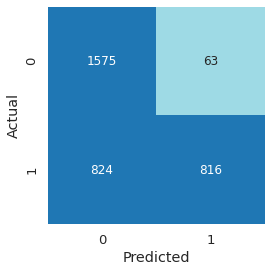

In [ ]:
#import libraries
from sklearn.metrics import confusion_matrix

#define CM object
confusion_matrix = confusion_matrix(Y_test, predictions_xgb_clf)
df_cm = pd.DataFrame(confusion_matrix, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

#plot the CM result
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="tab20_r")# font size

### Comments:
- Confusion matrix shows us that our model has a high number of False Negative predictions, giving us prediction accuracy about 0.735.

## 6.3. Classification Report

In [ ]:
from sklearn.metrics import classification_report
#get classification report
print(classification_report(Y_test, predictions_xgb_clf))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78      1638
           1       0.93      0.50      0.65      1640

    accuracy                           0.73      3278
   macro avg       0.79      0.73      0.71      3278
weighted avg       0.79      0.73      0.71      3278



### Comments
- Precision of classifying order as Delayed is lower compared to classifying it as "Being on Time", but because the recall of the latter one is twice as lower as for the first one (model gives false labels to true data) we are getting lower f1 score and hence the overall accuracy (0.73)

## 6.4. ROC Curve

In [ ]:
#import libraries
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

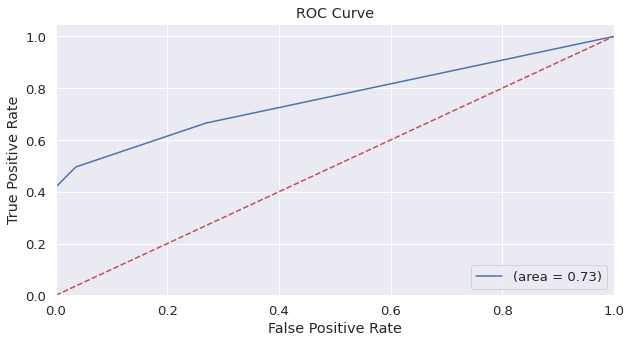

In [ ]:
#define ROC AUC object
logit_roc_auc = roc_auc_score(Y_test, predictions_xgb_clf)
fpr, tpr, thresholds = roc_curve(Y_test, xgb.predict_proba(X_test)[:,1])

#plotting the curve
plt.figure()
plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
#plt.savefig('roc.png', dpi=400,bbox_inches='tight')
plt.show()

### Comments:
- Because of the mediocre (yet the best) performance of our model, it is hard for us to set efficient decision boundary to identify if order is going to be on time or delayed. The confusion matrix above showed us that the model generates excessive numbers of False Negative labels making our curve slightly above the "random data line" without having explicit elbow.
- Area Under the Curve is equal to 0.74

# 7. Predictions on Unseen Data
## 7.1. Creating the DataFrame

### Comments
- In this section we are going to create an imaginary data to check the performance of the model

In [ ]:
#get columns names
print(features_rf.columns)

Index(['Discount_offered', 'Weight_in_gms'], dtype='object')


In [ ]:
# Df to predict
data_new = [
    [0, 1100],
    [70, 1100],
    [0, 5000],
    [70, 5000],
           ]
df_new = pd.DataFrame(data_new, columns = [ 'Discount_offered', 'Weight_in_gms'])

In [ ]:
df_new

,Discount_offered,Weight_in_gms
0,0,1100
1,70,1100
2,0,5000
3,70,5000


## 7.2. Rescaling the Features
- Using the previously declared and fitted RobustScaler to transform the data.

In [ ]:
#Use the previous robust scaler object to scale the unseen data
new_transformed = scaler.transform(df_new)

#create df again
data_new_transf = pd.DataFrame(new_transformed, index=df_new.index, columns = df_new.columns)
data_new_transf = data_new_transf.reset_index(drop=True)
data_new_transf.head()

,Discount_offered,Weight_in_gms
0,-1.166667,-0.978428
1,10.500000,-0.978428
2,-1.166667,0.223421
3,10.500000,0.223421


## 7.4. Retraining the best model using the complete dataset

In [ ]:
#Declare and fit the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric="error")
xgb.fit(X_train, Y_train, eval_set=[(X_test,Y_test)], eval_metric="error",verbose=False, early_stopping_rounds=14)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, use_label_encoder=False, verbosity=1)

## 7.3. Predicting the Results

In [ ]:
#Store classifier predictions
predictions_new=xgb.predict(data_new_transf)

print(predictions_new)

#add the predicted data to new dataframe
df_new["Predicted_Delivery_status"] = predictions_new
df_new.head()

[0 1 0 1]


,Discount_offered,Weight_in_gms,Predicted_Delivery_status
0,0,1100,0
1,70,1100,1
2,0,5000,0
3,70,5000,1


Text(0.5, 1.0, 'Features and Responses Relationship')

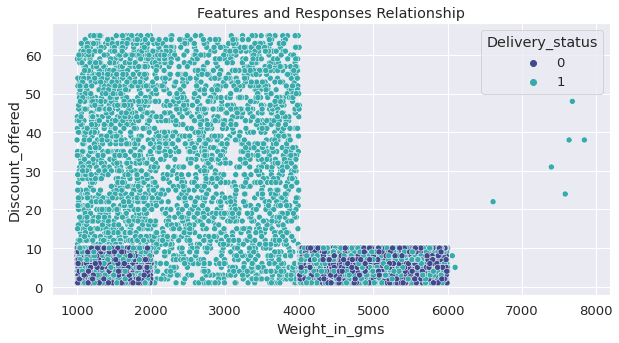

In [ ]:
#scatter plot for 2 main features
sns.scatterplot(x='Weight_in_gms', y='Discount_offered', data=df1, hue='Delivery_status', palette='mako')
plt.title("Features and Responses Relationship")
#plt.savefig("Scatter_main_Features", dpi=400, bbox_inches='tight')

## 7.4. Prediction Model Information
- For our predictions, we selected the classifier model as XGBoost, with early_stopping_rounds set to 14 to avoid overfitting.
    - The accuracy of this model in our testing dataset was approximately 74%
    - We can identify two sectors where the order will be more likely to be delayed.


## 7.5. Conclusion
- By applying different Feature selection techniques. The two best of them suggested to reduces our number of features to only two: Discount_offered and Weight_in_grams.
- Because of not significant correlation between the features and outcome we could not set up a model which could guarantee better result.
- Final model showed accuracy of 74%, with a decent number of false negative predictions.
- Prediction with unseen data showed us if data falls within some limits - discount <= 10% AND weight is less than 2000g OR in between 4000 and 6000 g - then it will classify it as delayed one (this can be seen on the figure above).
- For better model performance we suggest the company to look at some other features which could be more correlated to delivery problems (what providers they uses, delivery distance, date/time of delivery, etc.). 